# Using CNN for Tomatoes Diseases Prediction

# Import libraries

In [7]:
#Importing the required libraries for diseases prediction using CNN.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

#Using warning librariries to ignore the unnecessary warning.
import warnings
warnings.filterwarnings("ignore")

# Load dataset 

In [8]:
# loading the pictures of tomatoes for training and testing of image by assigning the image path.
train_data_dir = "tomato/train/"
test_data_dir  = "tomato/val/"

##  preprocessing 

In [9]:
# Preprocessing the image through normalization,image distortion, flipping, zooming for training the datas.
train_datagen = ImageDataGenerator(rescale=1/255.0,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.3)

# Preprocessing the image through normalization,image distortion, flipping, zooming for training the datas.
test_datagen = ImageDataGenerator(rescale=1/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [10]:
#This line outlines the application of the flow_from_directory method belonging to the ImageDataGenerator 
#for the purpose of creating batches of augmented images from a designated directory for training dataset.
train_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')

Found 7000 images belonging to 10 classes.


In [11]:
#This line outlines the application of the flow_from_directory method belonging to the ImageDataGenerator 
#for the purpose of creating batches of augmented images from a designated directory for the given value of dataset.
val_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 3000 images belonging to 10 classes.


In [12]:
#This line outlines the application of the flow_from_directory method belonging to the ImageDataGenerator 
#for the purpose of creating batches of augmented images from a designated directory for test dataset.
test_gen = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

Found 1000 images belonging to 10 classes.


# Building a CNN model

In [13]:
# This code defines a Convolutional Neural Network (CNN) tailored for image classification, with a presumed focus 
# on identifying diverse features within the images using MaxPooling, image tailoring, RELU activation, flatten

tomato_cnn = Sequential()

tomato_cnn.add(Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
tomato_cnn.add(MaxPooling2D(pool_size = (2, 2))),

tomato_cnn.add(Conv2D(64, (3,3), activation='relu')),
tomato_cnn.add(MaxPooling2D((2, 2))),

tomato_cnn.add(Conv2D (64, (3,3), activation='relu')),
tomato_cnn.add(MaxPooling2D((2, 2))),

tomato_cnn.add(Conv2D(64, (3, 3), activation='relu')), 
tomato_cnn.add(MaxPooling2D((2, 2))),

tomato_cnn.add(Conv2D (64, (3, 3), activation='relu')), 
tomato_cnn.add(MaxPooling2D((2, 2))),

tomato_cnn.add(Conv2D(64, (3, 3), activation='relu')), 
tomato_cnn.add(MaxPooling2D((2, 2))),

tomato_cnn.add(Flatten()),

tomato_cnn.add(Dense(64,activation='relu'))

tomato_cnn.add(Dense(10,activation='softmax'))

In [14]:
#The summary() method gives a quick look at the neural network's design, showing things like the layers, 
#how many parameters each layer has, and the total number of trainable parameters in the whole model.

tomato_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,914 (671.54 KB)

 Trainable params: 171,914 (671.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Setting up an optimizer for a neural network.
optimizer = Adam(learning_rate=0.001)

In [16]:
# This lines of code is used to compile model for training by indicating the optimization algorithm, minimize loss function.
tomato_cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Definimg the EarlyStopping callback
es = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, restore_best_weights=True)

# Updating steps_per_epoch and validation_steps to identify the percentage of accuracy.
tomato_disease_classifier = tomato_cnn.fit(
    x = train_gen,
    steps_per_epoch = 7000//32,
    epochs = 100,
    validation_steps = 3000//32,
    validation_data = val_gen)


Epoch 1/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 121s 541ms/step - accuracy: 0.1995 - loss: 2.1012 - val_accuracy: 0.4570 - val_loss: 1.4831
Epoch 2/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.5312 - loss: 0.6814 - val_accuracy: 0.3750 - val_loss: 0.7799
Epoch 3/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 116s 527ms/step - accuracy: 0.5058 - loss: 1.3204 - val_accuracy: 0.6512 - val_loss: 0.9817
Epoch 4/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.7188 - loss: 0.5165 - val_accuracy: 0.6667 - val_loss: 0.5403
Epoch 5/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 114s 515ms/step - accuracy: 0.6588 - loss: 0.9259 - val_accuracy: 0.6882 - val_loss: 0.8277
Epoch 6/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.6562 - loss: 0.4675 - val_accuracy: 0.7083 - val_loss: 0.3443
Epoch 7/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 120s 542ms/step - accuracy: 0.7415 - loss: 0.7342 - val_accuracy: 0.7245 - val_loss: 0.7226
Epoch 8/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.5625 -

In [18]:
# This line of  code predict the score of cnn accuracy.
scores = tomato_cnn.evaluate(test_gen)

32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 270ms/step - accuracy: 0.9207 - loss: 0.2999


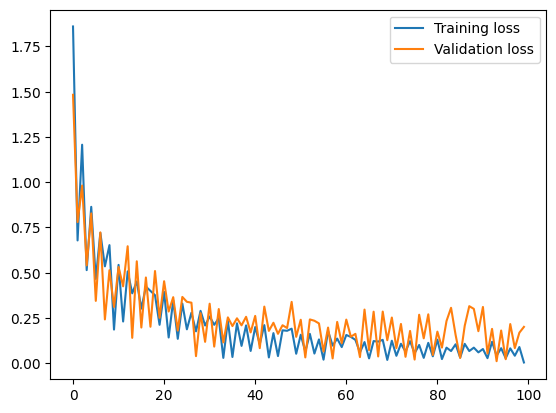

In [19]:
# plot the loss that is training loss and the validation loss.
plt.plot(tomato_disease_classifier.history['loss'], label='Training loss')
plt.plot(tomato_disease_classifier.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

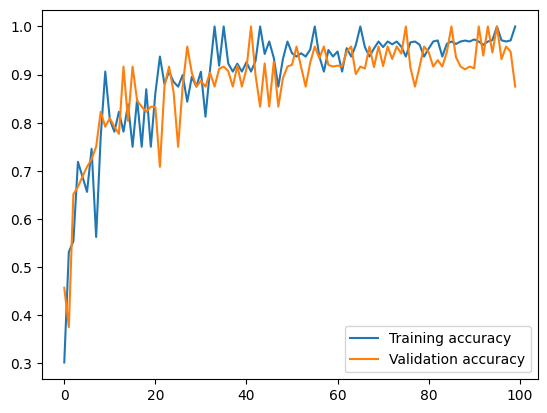

In [20]:
# Plotting the accuracy with training accuracy and the validation accuracy.
plt.plot(tomato_disease_classifier.history['accuracy'], label='Training accuracy')
plt.plot(tomato_disease_classifier.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [21]:
tomato_cnn.save("model/tomato_disease_classifier.keras")

In [22]:
# Make prediction

class_labels = {0:'Healthy', 1:'Bacterial Spot', 2:'Early Blight', 3:'Late Blight', 4:'Leaf Mold', 5:'Septoria leaf spot', 6:'Spider mites', 7:'Target Spot', 8:'Tomato mosaic virus', 9:'Tomato Yellow Leaf Curl Virus'}
img_path = "D:\\Downloads\\Tomato Mosaic.JPG"
img = image.load_img(img_path, target_size=(224, 224))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0 

predictions = tomato_cnn.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]
predicted_label = class_labels[predicted_class]

print("Predicted class:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted class: Tomato mosaic virus
